In [1]:
import wandb
import os
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import scipy
import tree
import json
import glob
fm.fontManager.addfont('../times.ttf')
fm.fontManager.addfont('../times_Italic.ttf')

jobs = {
    "infomax": [
        "skyworkrm_dpo_infomax_dyna_bon_real_0930T12:05",
        "skyworkrm_dpo_infomax_dyna_bon_real_0930T07:33",
        "skyworkrm_dpo_infomax_dyna_bon_real_0930T03:03"
    ],
    "doublets": [
        "skyworkrm_dpo_doublets_dyna_no_rnd_bon_real_0930T12:00",
        "skyworkrm_dpo_doublets_dyna_no_rnd_bon_real_0930T07:32",
        "skyworkrm_dpo_doublets_dyna_no_rnd_bon_real_0930T03:03",
    ],
    "duelingts": [
        "skyworkrm_dpo_dueling_dyna_bon_real_0930T12:00",
        "skyworkrm_dpo_dueling_dyna_bon_real_0930T07:29",
        "skyworkrm_dpo_dueling_dyna_bon_real_0930T03:01",
    ],
}

api = wandb.Api()
save_dir = "./exp_data"
runs = api.runs("lkevinzc/ellm_simpo")
data_list = []
cfg_list = []

features_of_interest = ["eval/online_win_probs", "eval/rm_win_rate_prob", "misc/query_step"]
flatten_fns = tree.flatten(jobs)
os.makedirs(save_dir, exist_ok=True)
for run in tqdm.tqdm(runs):
    cfg = run.config
    if run.name in flatten_fns:
        print(run.name)
        name = run.name
        if not os.path.exists(f"{save_dir}/{name}.csv"):
            data = run.history(keys=features_of_interest)
            data["seed"] = cfg["seed"]
            data["run_name"] = cfg["wandb_run_name"]
            
            if "infomax" in cfg["wandb_run_name"]:
                method = "infomax"
            elif "double" in cfg["wandb_run_name"]:
                method = "double"
            elif "duel" in cfg["wandb_run_name"]:
                method = "duel"

            data["method"] = method
            data.to_csv(f"{save_dir}/{name}.csv")

  0%|          | 0/769 [00:00<?, ?it/s]

skyworkrm_dpo_infomax_dyna_bon_real_0930T12:05


  0%|          | 1/769 [00:00<08:16,  1.55it/s]

skyworkrm_dpo_dueling_dyna_bon_real_0930T12:00


  0%|          | 2/769 [00:01<06:35,  1.94it/s]

skyworkrm_dpo_doublets_dyna_no_rnd_bon_real_0930T12:00


  0%|          | 3/769 [00:01<05:19,  2.40it/s]

skyworkrm_dpo_infomax_dyna_bon_real_0930T07:33


  1%|          | 4/769 [00:01<05:18,  2.40it/s]

skyworkrm_dpo_doublets_dyna_no_rnd_bon_real_0930T07:32


  1%|          | 5/769 [00:02<04:49,  2.64it/s]

skyworkrm_dpo_dueling_dyna_bon_real_0930T07:29


  1%|          | 6/769 [00:02<05:26,  2.34it/s]

skyworkrm_dpo_doublets_dyna_no_rnd_bon_real_0930T03:03


  1%|          | 7/769 [00:02<04:48,  2.64it/s]

skyworkrm_dpo_infomax_dyna_bon_real_0930T03:03


  1%|          | 8/769 [00:03<04:40,  2.71it/s]

skyworkrm_dpo_dueling_dyna_bon_real_0930T03:01


100%|██████████| 769/769 [00:13<00:00, 58.78it/s] 


In [2]:
fns = glob.glob(f"{save_dir}/*.csv")
dfs = [pd.read_csv(fn, index_col=0) for fn in fns]
df = pd.concat(dfs)
df

,_step,eval/online_win_probs,eval/rm_win_rate_prob,misc/query_step,seed,run_name,method
0,20,0.430486,0.604473,1960,2528854809,skyworkrm_dpo_dueling_dyna_bon_real,duel
1,50,0.555985,0.710572,4600,2528854809,skyworkrm_dpo_dueling_dyna_bon_real,duel
2,80,0.630592,0.746655,7240,2528854809,skyworkrm_dpo_dueling_dyna_bon_real,duel
3,110,0.639685,0.803735,9880,2528854809,skyworkrm_dpo_dueling_dyna_bon_real,duel
4,140,0.726985,0.822967,12520,2528854809,skyworkrm_dpo_dueling_dyna_bon_real,duel
...,...,...,...,...,...,...,...
15,470,0.866273,0.874504,41560,3208438186,skyworkrm_dpo_doublets_dyna_no_rnd_bon_real,double
16,500,0.847321,0.873514,44200,3208438186,skyworkrm_dpo_doublets_dyna_no_rnd_bon_real,double
17,530,0.827812,0.886625,46840,3208438186,skyworkrm_dpo_doublets_dyna_no_rnd_bon_real,double
18,560,0.847105,0.874842,49480,3208438186,skyworkrm_dpo_doublets_dyna_no_rnd_bon_real,double


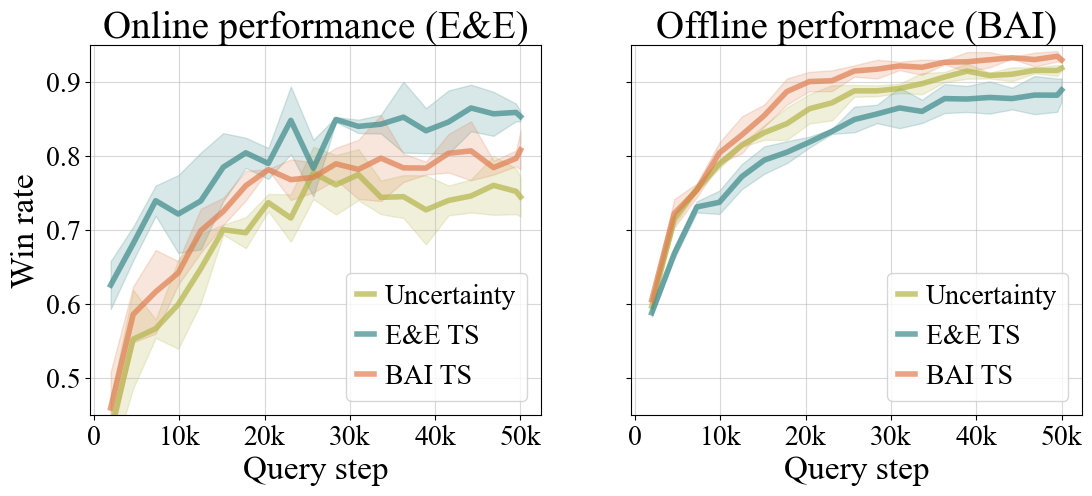

In [14]:
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

hue_order = [
    "infomax",
    "double",
    "duel",
]
methods_to_color = {
    "infomax": (180/255, 180/255, 73/255),
    "double": (60/255, 137/255, 138/255),
    "duel": (223/255, 126/255, 79/255),
}
methods_to_labels= {
    "infomax": "Uncertainty",
    "double": "E&E TS",
    "duel": "BAI TS",
}
fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(fig.get_figwidth() * 2)

for i, ax in enumerate(axes):
    yy = "eval/online_win_probs" if i==0 else "eval/rm_win_rate_prob"
    ax=sns.lineplot(data=df, x="misc/query_step", y=yy, hue="method", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2), ax=ax,
    palette=methods_to_color,
    # err_style="bars"
    hue_order=hue_order
                    )
    if i == 0:
        ax.set_title("Online performance (E&E)", fontsize=28)
    else:
        ax.set_title("Offline performace (BAI)", fontsize=28)

    sns.move_legend(
        ax, "best",
        # bbox_to_anchor=(0.45, -0.07), 
        ncol=1, 
        title=None, 
        frameon=True,
        labels=[methods_to_labels[k] for k in hue_order],
        handletextpad=0.4,
        handlelength=0.6,
        columnspacing=0.8
    )
    ax.set_ylabel('Win rate', fontsize=24)
    ax.set_xlabel('Query step', fontsize=24)
    ax.set_xticks([0, 10_000, 20_000, 30_000, 40_000, 50_000],
        ["0", "10k", "20k", "30k", "40k", "50k"])
    # ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
    ax.set_ylim(0.45, 0.95)
    ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
    fig.savefig("exp_methods.pdf", bbox_inches="tight")